In [1]:
sc

In [2]:
from pyspark.sql import SQLContext
sqlContext=SQLContext(sc)

In [3]:
data = sqlContext.read.format("libsvm")\
    .load("311_final.csv")

In [4]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [5]:
data

DataFrame[label: double, features: vector]

In [12]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

import time
start = time.time()

# Load training data
data = sqlContext.read.format("libsvm")\
    .load("\../data/311_final.csv")
# Split the data into train and test
splits = data.randomSplit([0.7, 0.3], 1234)
train = splits[0]
test = splits[1]
# specify layers for the neural network:
# input layer of size 4 (features), two intermediate of size 5 and 4
# and output of size 3 (classes)
layers = [7, 10, 12]
# create the trainer and set its parameters
trainer = MultilayerPerceptronClassifier(maxIter=100, layers=layers, blockSize=128, seed=1234)
# train the model
model = trainer.fit(train)
# compute precision on the test set
result = model.transform(test)
predictionAndLabels = result.select("prediction", "label")
evaluator = MulticlassClassificationEvaluator(metricName="precision")
print("Precision:" + str(evaluator.evaluate(predictionAndLabels)))

print time.time() - start

Precision:0.171785318915
1604.94338918


In [15]:
1604.94338918/60

26.749056486333334

# NN for Spark

In [15]:
df = sqlContext.read \
               .format("com.databricks.spark.csv") \
               .options(header="false", inferschema="false") \
               .load('result1.csv')

In [16]:
df.show()

+---+----+--------------------+--------------------+-------+---+----+---+----+
| C0|  C1|                  C2|                  C3|     C4| C5|  C6| C7|  C8|
+---+----+--------------------+--------------------+-------+---+----+---+----+
|  9|   8|            'Rodent'|    'Mouse Sighting'|  10038|  0|  10|  3|  0	|
|  9|   8|            'Rodent'|    'Mouse Sighting'|  10038|  0|  10|  3|  0	|
| 10|   8|            'Rodent'|  'Condition Attr...|  10001|  0|  10|  3|  0	|
| 11|   8|            'Rodent'|      'Rat Sighting'|  11215|  0|  10|  3|  0	|
| 11|   8|            'Rodent'|      'Rat Sighting'|  10309|  0|  10|  3|  0	|
| 10|   8|            'Rodent'|      'Rat Sighting'|  11211|  0|  10|  3|  0	|
|  8|   8|            'Rodent'|    'Mouse Sighting'|  10459|  0|  10|  3|  0	|
| 11|   8|            'Rodent'|      'Rat Sighting'|  11203|  0|  10|  3|  0	|
| 11|   8|            'Rodent'|  'Condition Attr...|  11225|  0|  10|  3|  0	|
| 10|   8|            'Rodent'|      'Rat Sighting'|

In [17]:
from pyspark.mllib.linalg import Vectors
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.param import Param, Params
from pyspark.ml.feature import Bucketizer, VectorAssembler, StringIndexer, IndexToString
from pyspark.ml import Pipeline

In [18]:
indexer1 = StringIndexer(inputCol="C1", outputCol="Complaint-index1").fit(df)
indexer2 = StringIndexer(inputCol="C5", outputCol="Complaint-index5").fit(df)
indexer3 = StringIndexer(inputCol="C6", outputCol="Complaint-index6").fit(df)
indexer4 = StringIndexer(inputCol="C7", outputCol="Complaint-index7").fit(df)
indexer5 = StringIndexer(inputCol="C8", outputCol="Complaint-index8").fit(df)

assembler = VectorAssembler(inputCols=["Complaint-index1","Complaint-index5","Complaint-index6","Complaint-index7", "Complaint-index8"], outputCol="features")
pipeline = Pipeline(stages=[indexer1, indexer2, indexer3, indexer4, indexer5, assembler])
model = pipeline.fit(df)
new_df = model.transform(df)


In [19]:
indexer6 = StringIndexer(inputCol="C0", outputCol="label").fit(new_df)
new_df_1 = indexer6.transform(new_df)

In [20]:
df_1 = new_df_1.select(new_df_1['label'], new_df_1['features'])

In [21]:
df_1.show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  1.0|[7.0,0.0,5.0,3.0,...|
|  1.0|[7.0,0.0,5.0,3.0,...|
|  0.0|[7.0,0.0,5.0,3.0,...|
|  4.0|[7.0,0.0,5.0,3.0,...|
|  4.0|[7.0,0.0,5.0,3.0,...|
|  0.0|[7.0,0.0,5.0,3.0,...|
|  2.0|[7.0,0.0,5.0,3.0,...|
|  4.0|[7.0,0.0,5.0,3.0,...|
|  4.0|[7.0,0.0,5.0,3.0,...|
|  0.0|[7.0,0.0,5.0,3.0,...|
|  2.0|[7.0,0.0,5.0,3.0,...|
|  4.0|[7.0,0.0,5.0,3.0,...|
|  8.0|[1.0,0.0,0.0,4.0,...|
|  9.0|[1.0,18.0,0.0,4.0...|
|  3.0|[1.0,18.0,0.0,4.0...|
|  2.0|[8.0,18.0,0.0,4.0...|
|  0.0|[8.0,20.0,0.0,4.0...|
|  3.0|[1.0,18.0,0.0,4.0...|
|  0.0|[8.0,0.0,0.0,4.0,...|
|  7.0|[1.0,18.0,0.0,4.0...|
+-----+--------------------+
only showing top 20 rows



In [ ]:
# df_1.select("label", "features").write.save("nndata.csv", "com.databricks.spark.csv"); 

In [ ]:
splits = df_1.randomSplit([0.7, 0.3], 1234)
train = splits[0]
test = splits[1]

layers = [5, 2, 12]

trainer = MultilayerPerceptronClassifier(maxIter=100, layers=layers, blockSize=128, seed=1234)
# train the model
model = trainer.fit(train)
# compute precision on the test set
result = model.transform(test)
predictionAndLabels = result.select("prediction", "label")
evaluator = MulticlassClassificationEvaluator(metricName="precision")
print("Precision:" + str(evaluator.evaluate(predictionAndLabels)))

In [ ]:
result

In [ ]:
predictionAndLabels = result.select("prediction", "label")
evaluator = MulticlassClassificationEvaluator(metricName="precision")
print("Precision:" + str(evaluator.evaluate(predictionAndLabels)))

# -

In [ ]:
# String indexer converts a set of strings into doubles
# indexer1 = StringIndexer(inputCol="C1", outputCol="Agency-index").fit(df)
indexer2 = StringIndexer(inputCol="C2", outputCol="Complaint-index").fit(df)
# indexer3 = StringIndexer(inputCol="C4", outputCol="ZIP-index").fit(df)

# Combines a list of double input features into a vector
assembler = VectorAssembler(inputCols=["C1", "Complaint-index", "C4", "C5", "C6", "C7", "C8"], outputCol="features")
# assembler = VectorAssembler(inputCols=["Complaint-index"], outputCol="features")

# String indexer converts a set of strings into doubles
indexer = StringIndexer(inputCol="C0", outputCol="category-index").fit(df)

# Specify model
layers = [1, 10, 12]

# dt = DecisionTreeClassifier(labelCol = "category-index", featuresCol="features")
dt = MultilayerPerceptronClassifier(labelCol = "category-index", featuresCol="features", predictionCol="prediction", layers=layers)

# Can be used to combine pipeline components together
pipeline = Pipeline(stages=[indexer2, assembler, indexer, dt])

In [ ]:
(trainingData, testData) = df.randomSplit([0.7, 0.3])

In [ ]:
# train the model on the training data
model = pipeline.fit(trainingData)

# Run the model also on the training data (for evaluation purposes)
training = model.transform(trainingData)

# Run the model on the testing data for predictions
predictions = model.transform(testData)

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(labelCol="category-index", predictionCol="prediction", metricName="precision")
accuracy = evaluator.evaluate(predictions)
print "Test Error = %g" % (1.0 - accuracy)
print "Accuracy = %g" % (accuracy)

 ## Test

In [ ]:
indexer1 = StringIndexer(inputCol="C1", outputCol="Agency-index").fit(df)
pipeline = Pipeline(stages=[indexer1])
model = pipeline.fit(trainingData)

In [ ]:
training = model.transform(trainingData)

In [ ]:
training.filter(training['Agency-index'] < 4).show()


In [ ]:
training.show()

In [ ]:
import pandas as pd

df1 = pd.read_csv("result.csv")

In [ ]:
df1.head()

In [ ]:
a = df1.iloc[:,2].unique()
b = []
for i in a:
    c = i.strip(" ")
    c = c.strip("'")
    b.append(c)

In [ ]:
b

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('311dataset_reduced_withdiff.csv')

In [3]:
df

,Unnamed: 0,ID,StartDate,CloseDate,Dept,Type,Detail,MoreDetail,Zip,DueDate,IsClosed,WeekDay,TimeToClose,TimePredicted,TimeToClose_f,TimePredicted_f,DiffPred_f
0,43,15626884,2010-01-01 00:16:32,2010-01-01 01:16:16,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11207,2010-01-01 08:16:32,True,4,0 days 00:59:44.000000000,0 days 08:00:00.000000000,0.041481,0.333333,0.291852
1,44,15626887,2010-01-01 00:59:56,2010-01-01 04:40:35,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11234,2010-01-01 08:59:56,True,4,0 days 03:40:39.000000000,0 days 08:00:00.000000000,0.153229,0.333333,0.180104
2,45,15626888,2010-01-01 01:06:23,2010-01-01 05:58:29,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10025,2010-01-01 09:06:23,True,4,0 days 04:52:06.000000000,0 days 08:00:00.000000000,0.202847,0.333333,0.130486
3,46,15626889,2010-01-01 01:12:15,2010-01-01 03:11:38,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11420,2010-01-01 09:12:15,True,4,0 days 01:59:23.000000000,0 days 08:00:00.000000000,0.082905,0.333333,0.250428
4,47,15626892,2010-01-01 01:44:00,2010-01-01 02:21:14,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11385,2010-01-01 09:44:00,True,4,0 days 00:37:14.000000000,0 days 08:00:00.000000000,0.025856,0.333333,0.307477
5,48,15626969,2010-01-01 00:30:36,2010-01-01 00:51:17,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10472,2010-01-01 08:30:36,True,4,0 days 00:20:41.000000000,0 days 08:00:00.000000000,0.014363,0.333333,0.318970
6,49,15626974,2010-01-01 01:13:03,2010-01-01 05:21:25,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11214,2010-01-01 09:13:03,True,4,0 days 04:08:22.000000000,0 days 08:00:00.000000000,0.172477,0.333333,0.160856
7,52,15627059,2010-01-01 02:06:17,2010-01-26 02:13:04,TLC,Taxi Complaint,Driver Complaint,Street,10002,2010-01-26 11:21:27,True,4,25 days 00:06:47.000000000,25 days 09:15:10.000000000,25.004711,25.385532,0.380822
8,53,15627076,2010-01-01 00:48:39,2010-01-01 02:33:32,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10014,2010-01-01 08:48:39,True,4,0 days 01:44:53.000000000,0 days 08:00:00.000000000,0.072836,0.333333,0.260498
9,54,15627080,2010-01-01 01:14:42,2010-01-01 02:02:23,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10003,2010-01-01 09:14:42,True,4,0 days 00:47:41.000000000,0 days 08:00:00.000000000,0.033113,0.333333,0.300220


In [4]:
df1 = df.loc[:,["DiffPred_f"]]

In [5]:
df1['DiffPred_f']=abs(df1['DiffPred_f'])

In [6]:
df1 = df1.sort(columns='DiffPred_f', ascending=False)
df2 = df1.sort(columns='DiffPred_f', ascending=True)

/Users/Tianqi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
/Users/Tianqi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [7]:
df3 = df2[df2['DiffPred_f']<1]

In [8]:
df1

,DiffPred_f
2770190,30702.556620
106023,1970.035671
132498,1924.146238
23911,1866.957998
6118,1857.950729
11871,1843.097523
27827,1826.996655
27562,1826.897500
23507,1826.681481
11253,1822.999595


In [9]:
df2

,DiffPred_f
281926,0.000000
2380249,0.000000
1497235,0.000000
1307801,0.000000
1415553,0.000000
2713939,0.000000
2170192,0.000012
2952123,0.000012
1416298,0.000012
2406246,0.000012


Populating the interactive namespace from numpy and matplotlib


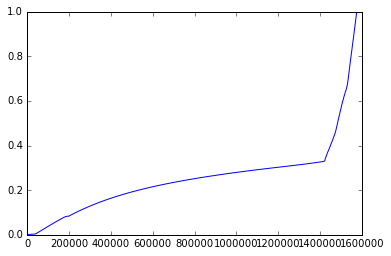

In [10]:
import matplotlib.pyplot as plt #plotting
%pylab inline 

plt.plot(range(len(df3)), df3.DiffPred_f)

In [11]:
len(df1)

2964205

In [12]:
a = []
a.append([2964205*.10
, 2964205*.14
, 2964205*.18
, 2964205*.23
, 2964205*.26
, 2964205*.32
, 2964205*.39
, 2964205*.49
, 2964205*.60
, 2964205*.75
, 2964205*.90])

In [13]:
a

[[296420.5,
  414988.7,
  533556.9,
  681767.15,
  770693.3,
  948545.6,
  1156039.95,
  1452460.45,
  1778523.0,
  2223153.75,
  2667784.5]]

In [14]:
for i in a[0]:
    print df2.iloc[int(i),0]*24

3.05166666667
4.04305555555
4.80805555555
5.55444444444
5.92527777778
6.55000000001
7.14972222223
9.8036111111
84.45
193.300833333
587.054722222


In [15]:
print df2.iloc[741051,0]  # 25%
print df2.iloc[1482102,0]  # 50%
print df2.iloc[2223153,0]  # 75%
print df2.iloc[2667784,0]  # 90%

0.241990740741
0.49599537037
8.05420138889
24.4606134259


In [16]:
len(df[df1['DiffPred_f']>30])

/Users/Tianqi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


202612

In [17]:
202612.0/2964205

0.06835289731985474